In [2]:
import numpy as np
import pandas as pd
import xarray as xr
import os
import matplotlib.pyplot as plt
import scipy.io
import scipy.special
import warnings

from optparse import OptionParser



In [3]:
# TODO: Add options to change the comparison type (abs dif, misfit function, whatever )
#parser.add_option("-1", "--file1", dest="file1", help="get input data from file", metavar="FILE")
fn1     = '/home/kblum/local/pism/sources/pism-emulator/speedemulator/experiment_dirs/exp_floating/debug_floating.nc'
coord1  = 'velsurf_mag'         
fn2     =  '/home/kblum/uaf-antarctica/data_sets/velocities/antarctica_ice_velocity_g4000m.nc'
coord2  = 'velsurf_mag'
with xr.open_dataset(fn1) as data1, xr.open_dataset(fn2) as data2:
    modelled = data1[coord1]
    reality  = data2[coord2]
    #print(modelled)
signed_dif = reality - modelled
abs_dif = abs(signed_dif)
percent_dif = (abs(reality-modelled)/((reality/2)+(modelled/2)))*100
lsq     = np.sqrt(abs(reality**2 - modelled**2))

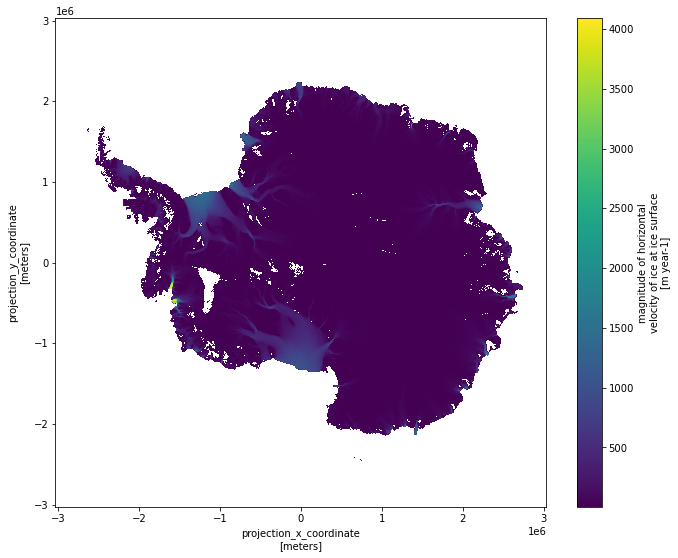

In [4]:
plt.figure(figsize=(11,9))
reality.plot()

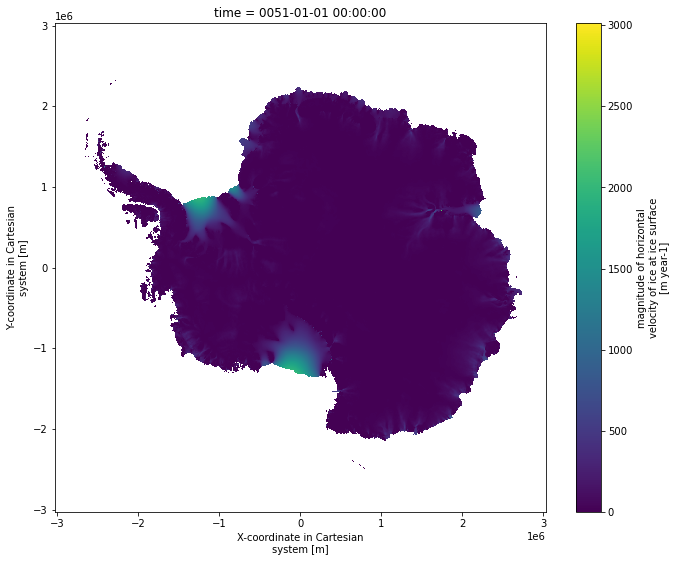

In [5]:
plt.figure(figsize=(11,9))
modelled.plot()

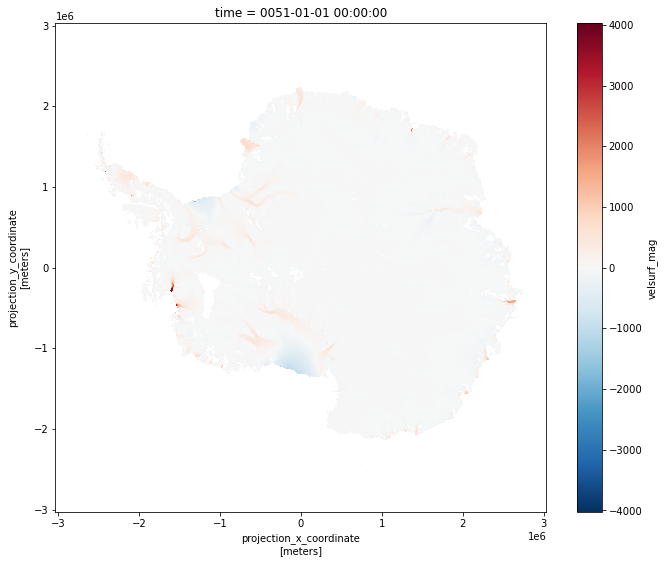

In [6]:
# dif is reality - model
# red  : reality has larger mag
# blue : modelled has larger mag
plt.figure(figsize=(11,9))
signed_dif.plot()

In [67]:
#fname="signed_diff.nc"
#dif.to_netcdf(fname)

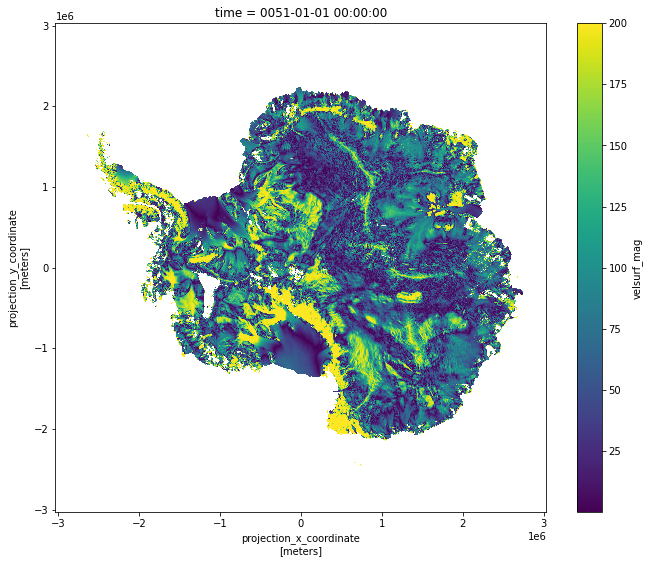

In [7]:
plt.figure(figsize=(11,9))
percent_dif.plot()

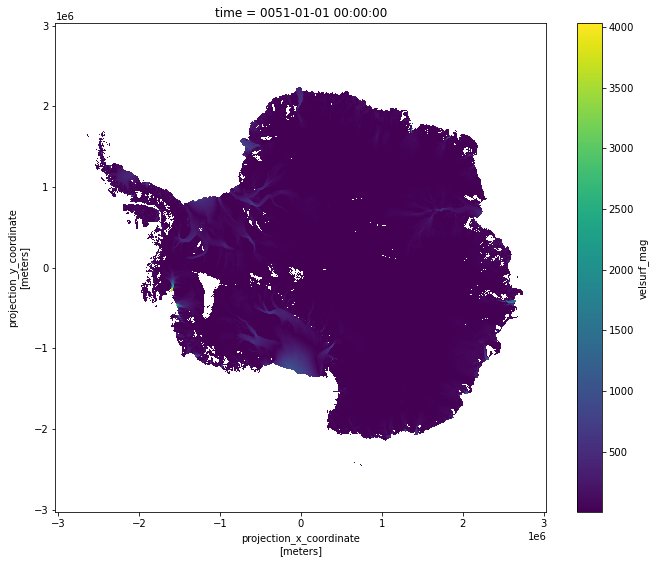

In [8]:
plt.figure(figsize=(11,9))
abs_dif.plot()

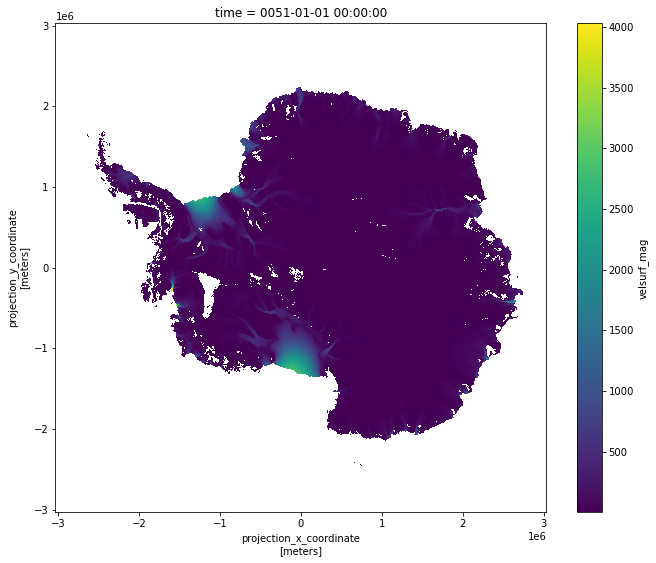

In [70]:
plt.figure(figsize=(11,9))
lsq.plot()